Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [3]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [4]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [7]:
from sklearn.preprocessing import PolynomialFeatures

fi = PolynomialFeatures(1).fit_transform(X)

X_2 = np.array([[1, 2, 3, 4, 5, 6],[0, 1, 2, 3, 4, 5],[0, 1, 2, 3, 4, 5],[0, 1, 2, 3, 4, 5]]) 
fi_2 = PolynomialFeatures(2, interaction_only=True).fit_transform(X_2)
print(fi_2)
fi

[[ 1.  1.  2.  3.  4.  5.  6.  2.  3.  4.  5.  6.  6.  8. 10. 12. 12. 15.
  18. 20. 24. 30.]
 [ 1.  0.  1.  2.  3.  4.  5.  0.  0.  0.  0.  0.  2.  3.  4.  5.  6.  8.
  10. 12. 15. 20.]
 [ 1.  0.  1.  2.  3.  4.  5.  0.  0.  0.  0.  0.  2.  3.  4.  5.  6.  8.
  10. 12. 15. 20.]
 [ 1.  0.  1.  2.  3.  4.  5.  0.  0.  0.  0.  0.  2.  3.  4.  5.  6.  8.
  10. 12. 15. 20.]]


array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

w = matmul(matmul(inv(matmul(fi.transpose(), fi)), fi.transpose()), y)
wPseudo = matmul(pinv(fi), y)

print("Težine modela w bez korištenja pinv: ", w)
print("Težine modela w sa korištenjem pinv: ", wPseudo)

Težine modela w bez korištenja pinv:  [2.2        0.45714286]
Težine modela w sa korištenjem pinv:  [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [6]:
from sklearn.metrics import mean_squared_error
D = np.c_[X, y]

def h(w, x):
    return matmul(w.transpose(), x)

y_pred = [h(w, fi[0]), h(w, fi[1]), h(w, fi[2]), h(w, fi[3])]
E = mean_squared_error(y, y_pred)

print("Primjeri D: \n", D)
print("Izračunati izlazi: ", y_pred)
print("Pogreška učenja: ", E)

Primjeri D: 
 [[0 4]
 [1 1]
 [2 2]
 [4 5]]
Izračunati izlazi:  [2.2000000000000024, 2.6571428571428592, 3.114285714285716, 4.02857142857143]
Pogreška učenja:  2.0428571428571427


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
try:
    matmul(inv(fi), y)
except LinAlgError as e:
    print(str(e))

Last 2 dimensions of the array must be square


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

y_pred_two = model.predict(X)
E_two = mean_squared_error(y, y_pred_two)

w_1e = []
w_1e.append(model.intercept_)
w_1e.extend(model.coef_)

print("Težine: ", w_1e)
print("Pogreška učenja: ", E_two)

Težine:  [2.2, 0.45714285714285713]
Pogreška učenja:  2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [9]:
from numpy.random import normal

def make_labels(X, f, noise=0):
    y = [f(X[i]) + normal(0, noise) for i in range(len(X))] 
    return y

In [10]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [11]:
def f(x):
    return 5 + x - 2 * x**2 - 5 * x**3

Xs = make_instances(-5, 5, 50)
ys = make_labels(Xs, f, 200)
learn = np.c_[Xs, ys]

learn

array([[-5.00000000e+00,  3.08497438e+02],
       [-4.79591837e+00,  5.95881826e+02],
       [-4.59183673e+00,  5.52385791e+02],
       [-4.38775510e+00,  9.10300201e+02],
       [-4.18367347e+00,  1.39453098e+02],
       [-3.97959184e+00,  4.53712553e+02],
       [-3.77551020e+00,  5.62434967e+02],
       [-3.57142857e+00,  2.69062018e+02],
       [-3.36734694e+00,  1.34019014e+02],
       [-3.16326531e+00,  8.40962036e+01],
       [-2.95918367e+00,  1.10875611e+02],
       [-2.75510204e+00,  1.74447329e+02],
       [-2.55102041e+00,  3.89909814e+02],
       [-2.34693878e+00, -1.61685204e+02],
       [-2.14285714e+00, -6.51317968e+01],
       [-1.93877551e+00,  2.17580888e+02],
       [-1.73469388e+00,  1.93381118e+02],
       [-1.53061224e+00,  2.95770903e+02],
       [-1.32653061e+00,  4.92873393e+01],
       [-1.12244898e+00, -8.83189998e+01],
       [-9.18367347e-01, -4.18129023e+01],
       [-7.14285714e-01, -1.32829052e+02],
       [-5.10204082e-01,  5.10185941e+01],
       [-3.

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

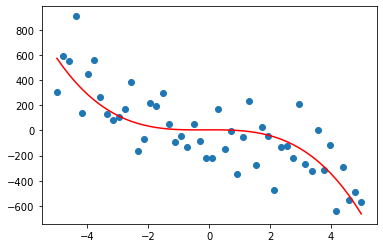

In [12]:
scatter(Xs, ys)
plot(Xs, f(Xs), 'r')

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Pogreška učenja modela:  33599.48670349571 



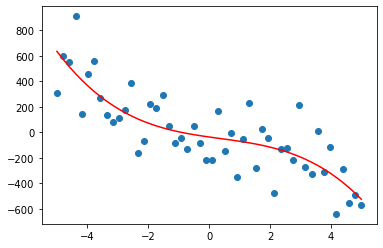

In [13]:
# Vaš kôd ovdje
fi_two = PolynomialFeatures(3).fit_transform(Xs)
w_two = matmul(pinv(fi_two), ys)
h_two = matmul(fi_two, w_two)
E_three = mean_squared_error(ys, h_two)
print("Pogreška učenja modela: ", E_three, "\n")

scatter(Xs, ys)
plot(Xs, h_two, 'r')

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Pogreška učenja modela stupnja 1 :  38738.30587164766 

Pogreška učenja modela stupnja 3 :  33599.48670349571 

Pogreška učenja modela stupnja 5 :  32353.66805123079 

Pogreška učenja modela stupnja 10 :  28781.22207989813 

Pogreška učenja modela stupnja 20 :  26826.141119470707 



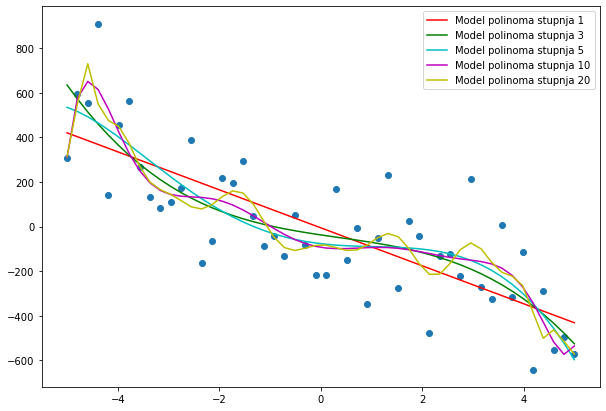

In [14]:
figure(figsize=(10,7))
scatter(Xs, ys)
colours = ['r','g','c','m', 'y']
counter = 0;

for i in [1, 3, 5, 10, 20]:
    fi_d = PolynomialFeatures(i).fit_transform(Xs)
    w_d = matmul(pinv(fi_d), ys)
    h_d = matmul(fi_d, w_d)
    E_d = mean_squared_error(ys, h_d)
    print("Pogreška učenja modela stupnja", i, ": ", E_d, "\n")
    plot(Xs, h_d, colours[counter], label="Model polinoma stupnja {}".format(i))
    legend(loc='upper right')
    counter += 1

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

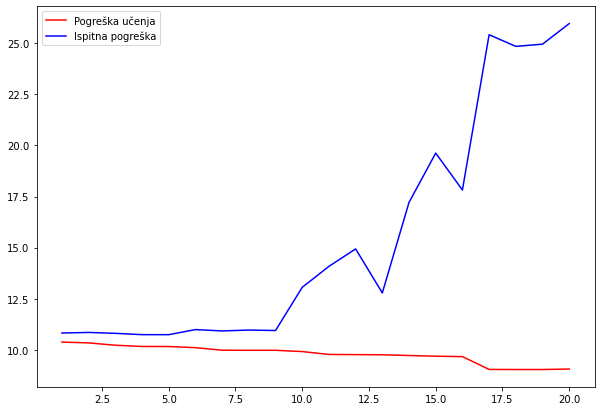

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.5)
E_train = []
E_test = []
for i in range(1, 21):
    fi_d_two = PolynomialFeatures(i).fit_transform(X_train)
    w_d_two = matmul(pinv(fi_d_two), y_train)
    h_train = matmul(fi_d_two, w_d_two)
    h_test = matmul(PolynomialFeatures(i).fit_transform(X_test), w_d_two)
    E_train.append(log(mean_squared_error(y_train, h_train)))
    E_test.append(log(mean_squared_error(y_test, h_test)))

figure(figsize=(10,7))
plot([i for i in range(1, 21)], E_train, 'r', label='Pogreška učenja')
plot([i for i in range(1, 21)], E_test, 'b', label='Ispitna pogreška')
legend(loc='upper left')

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

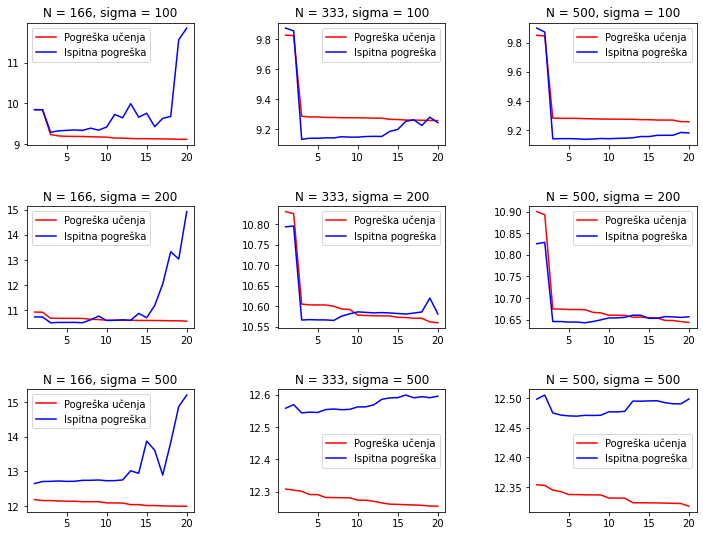

In [16]:
sigma = [100, 200, 500]
instances = make_instances(-5, 5, 1000)
X_train_two, X_test_two = train_test_split(instances, test_size=0.5)
X_data_train = []
X_data_test = []
y_data_train = []
y_data_test = []

for i in range(3):
    y_train_two = make_labels(X_train_two, f, sigma[i])
    y_test_two = make_labels(X_test_two, f, sigma[i])
    for j in range(3):
        X_data_train.append(X_train_two[0 : (int)(500 * (j + 1) / 3), :])
        X_data_test.append(X_test_two[0 : (int)(500 * (j + 1) / 3), :])
        y_data_train.append(y_train_two[0 : (int)(500 * (j + 1) / 3)])
        y_data_test.append(y_test_two[0 : (int)(500 * (j + 1) / 3)])

figure(figsize=(12,9))
subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(0, 9):
    E_train_three = []
    E_test_three = []
    for d in range(1, 21):
        fi_d_three = PolynomialFeatures(d).fit_transform(X_data_train[i])
        w_d_three = matmul(pinv(fi_d_three), y_data_train[i])
        h_train_three = matmul(fi_d_three, w_d_three)
        h_test_three = matmul(PolynomialFeatures(d).fit_transform(X_data_test[i]), w_d_three)
        E_train_three.append(log(mean_squared_error(y_data_train[i], h_train_three)))
        E_test_three.append(log(mean_squared_error(y_data_test[i], h_test_three)))
    subplot(3, 3, i + 1)
    title("N = {}, sigma = {}".format((int) (500 * (i % 3 + 1) / 3), sigma[(int)(i / 3)]))
    plot([d for d in range(1, 21)], E_train_three, 'r', label='Pogreška učenja')
    plot([d for d in range(1, 21)], E_test_three, 'b', label='Ispitna pogreška')
    legend(loc='best')
    

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [17]:
# Vaš kôd ovdje
fi_4a = PolynomialFeatures(3).fit_transform(X)
w_4a_0 = matmul(matmul(inv(np.add(matmul(fi_4a.transpose(), fi_4a), np.dot(0, np.identity(4)))), fi_4a.transpose()), y)

lambda_I_1 = np.dot(1, np.identity(4))
lambda_I_1[0][0] = 0
w_4a_1 = matmul(matmul(inv(np.add(matmul(fi_4a.transpose(), fi_4a), lambda_I_1)), fi_4a.transpose()), y)

lambda_I_10 = np.dot(10, np.identity(4))
lambda_I_10[0][0] = 0
w_4a_10 = matmul(matmul(inv(np.add(matmul(fi_4a.transpose(), fi_4a), lambda_I_10)), fi_4a.transpose()), y)

print("Lambda = 0: ", w_4a_0)
print("Lambda = 1: ", w_4a_1)
print("Lambda = 10: ", w_4a_10)

Lambda = 0:  [ 4.         -5.91666667  3.375      -0.45833333]
Lambda = 1:  [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Lambda = 10:  [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [18]:
from sklearn.linear_model import Ridge

clf_0 = Ridge(alpha = 0)
clf_1 = Ridge(alpha = 1)
clf_10 = Ridge(alpha = 10)

print("fi: ", fi_4a)
clf_0.fit(fi_4a, y)
clf_1.fit(fi_4a, y)
clf_10.fit(fi_4a, y)

w_4b_0 = clf_0.coef_
w_4b_0[0] = clf_0.intercept_
w_4b_1 = clf_1.coef_
w_4b_1[0] = clf_1.intercept_
w_4b_10 = clf_10.coef_
w_4b_10[0] = clf_10.intercept_


print("y: ", y)
print("Lambda = 0: ", w_4b_0)
print("Lambda = 1 ", w_4b_1)
print("Lambda = 10:", w_4b_10)

fi:  [[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
y:  [4 1 2 5]
Lambda = 0:  [ 4.         -5.91666667  3.375      -0.45833333]
Lambda = 1  [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Lambda = 10: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

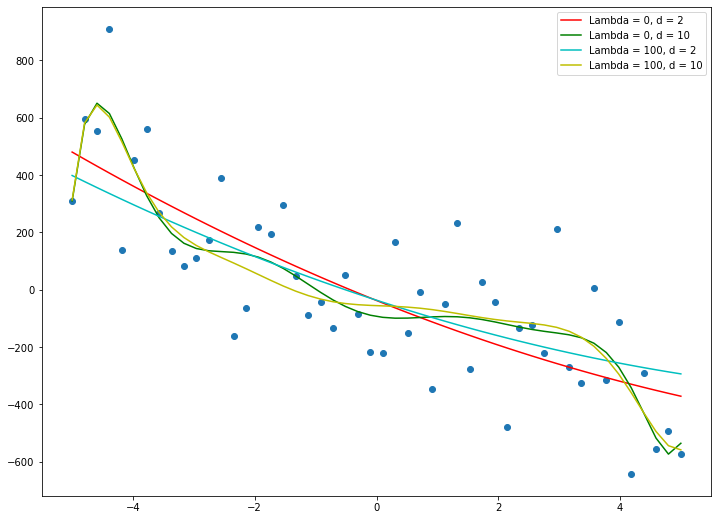

In [19]:
# Vaš kôd ovdje
figure(figsize=(12,9))
scatter(Xs, ys)
colours = ['r','g','c','y']
counter = 0
w_5a = []
y_5a = [x[0] for x in ys]  #ys iz zadatka 2, samo kao 1D polje

for lambda_coef in [0, 100]:
    clf_5a = Ridge(alpha = lambda_coef)
    for d in [2, 10]:
        fi_5a = PolynomialFeatures(d).fit_transform(Xs)
        clf_5a.fit(fi_5a, y_5a)
        w_5a.append(clf_5a.coef_)
        w_5a[counter][0] = clf_5a.intercept_
        h_5a = matmul(fi_5a, w_5a[counter])
        plot(Xs, h_5a, colours[counter], label="Lambda = {}, d = {}".format(lambda_coef, d))
        counter += 1
        
legend(loc='best')


### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


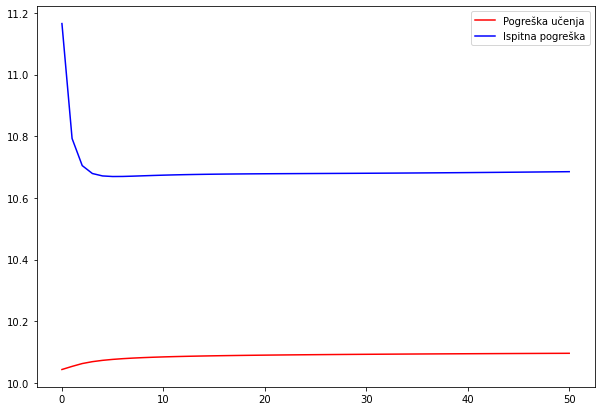

In [21]:
# Vaš kôd ovdje
X_train_5b, X_test_5b, y_train_5b, y_test_5b = train_test_split(Xs, y_5a, test_size=0.5)
E_train_5b = []
E_test_5b = []
fi_train_5b = PolynomialFeatures(10).fit_transform(X_train_5b)
fi_test_5b = PolynomialFeatures(10).fit_transform(X_test_5b)

for lambda_coef in range(0, 51):
    clf_5b = Ridge(alpha = lambda_coef)
    clf_5b.fit(fi_train_5b, y_train_5b)
    h_train_5b = clf_5b.predict(fi_train_5b)
    h_test_5b = clf_5b.predict(fi_test_5b)
    E_train_5b.append(log(mean_squared_error(y_train_5b, h_train_5b)))
    E_test_5b.append(log(mean_squared_error(y_test_5b, h_test_5b)))

figure(figsize=(10,7))
plot([i for i in range(0, 51)], E_train_5b, 'r', label='Pogreška učenja')
plot([i for i in range(0, 51)], E_test_5b, 'b', label='Ispitna pogreška')
legend(loc='best')

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [22]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

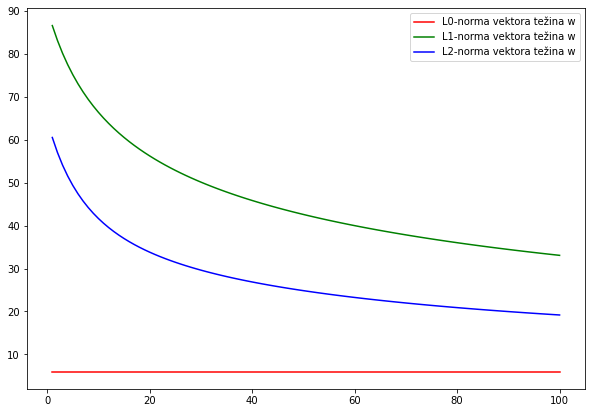

In [25]:
from sklearn.linear_model import Ridge

fi_train_6a = PolynomialFeatures(5).fit_transform(X_train)
fi_test_6a = PolynomialFeatures(5).fit_transform(X_test)
l0_6a = []
l1_6a = []
l2_6a = []

for lambda_coef in range(1, 101):
    lambda_I_1 = np.dot(lambda_coef, np.identity(6))
    lambda_I_1[0][0] = 0
    w_6a = matmul(matmul(inv(np.add(matmul(fi_train_6a.transpose(), fi_train_6a), lambda_I_1)), fi_train_6a.transpose()), y_train)
    l0_6a.append(nonzeroes(w_6a))
    l1_6a.append(0)
    l2_6a.append(0)
    for j in range(1, 6):
        l1_6a[lambda_coef - 1] += abs(w_6a[j][0])
        l2_6a[lambda_coef - 1] += w_6a[j][0] ** 2
    l2_6a[lambda_coef - 1] = sqrt(l2_6a[lambda_coef - 1])
        
figure(figsize=(10,7))
plot([i for i in range(1, 101)], l0_6a, 'r', label='L0-norma vektora težina w')
plot([i for i in range(1, 101)], l1_6a, 'g', label='L1-norma vektora težina w')
plot([i for i in range(1, 101)], l2_6a, 'b', label='L2-norma vektora težina w')
legend(loc='best')

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

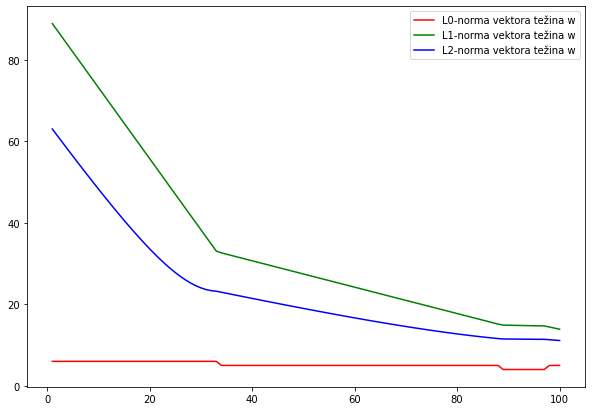

In [33]:
from sklearn.linear_model import Lasso

l0_6b = []
l1_6b = []
l2_6b = []

for lambda_coef in range(1, 101):
    clf_6b = Lasso(alpha = lambda_coef)
    clf_6b.fit(fi_train_6a, y_train)
    w_6b = clf_6b.coef_
    w_6b[0] = clf_6b.intercept_
    l0_6b.append(nonzeroes(w_6b))
    l1_6b.append(0)
    l2_6b.append(0)
    for j in range(1, 6):
        l1_6b[lambda_coef - 1] += abs(w_6b[j])
        l2_6b[lambda_coef - 1] += w_6b[j] ** 2
    l2_6b[lambda_coef - 1] = sqrt(l2_6b[lambda_coef - 1])
        
figure(figsize=(10,7))
plot([i for i in range(1, 101)], l0_6b, 'r', label='L0-norma vektora težina w')
plot([i for i in range(1, 101)], l1_6b, 'g', label='L1-norma vektora težina w')
plot([i for i in range(1, 101)], l2_6b, 'b', label='L2-norma vektora težina w')
legend(loc='best')

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [516]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

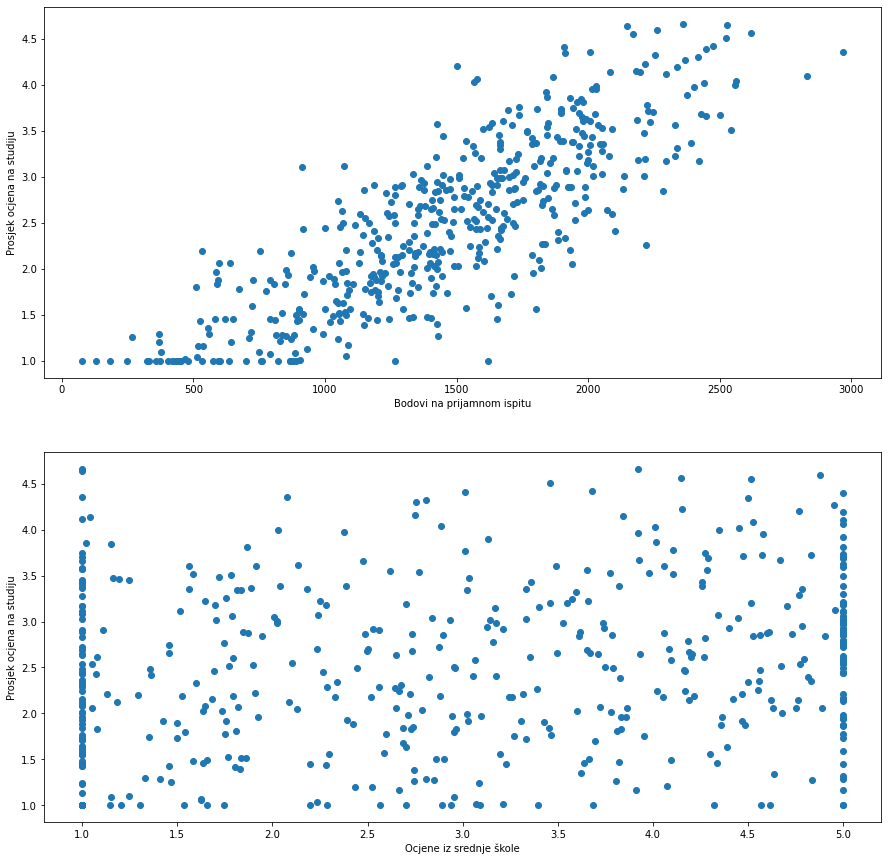

In [526]:
figure(figsize=(15, 15))

subplot(2, 1, 1)
xlabel('Bodovi na prijamnom ispitu')
ylabel('Prosjek ocjena na studiju')
scatter(exam_score, grades_y)

subplot(2, 1, 2)
xlabel('Ocjene iz srednje škole')
ylabel('Prosjek ocjena na studiju')
scatter(grade_in_highschool, grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [701]:
clf_7b = Ridge(alpha = 0.01)
clf_7b.fit(grades_X, grades_y)

print(clf_7b.coef_)
print(clf_7b.intercept_)

[0.00141497 0.09477276]
0.15061179575776018


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [704]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))

clf_7b2 = Ridge(alpha = 0.01)
clf_7b2.fit(grades_X_fixed, [l[0] for l in grades_y_fixed])

print(clf_7b2.coef_)
print(clf_7b2.intercept_)

[0.81630375 0.15167761]
8.625513311328875e-17


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [611]:
column = grades_X_fixed[:, -1].reshape(-1, 1)
grades_X_fixed_colinear = np.hstack([grades_X_fixed, column])

print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [705]:
clf_8a = Ridge(alpha = 0.01)
clf_8a.fit(grades_X_fixed_colinear, [l[0] for l in grades_y_fixed])

print(clf_8a.coef_)
print(clf_8a.intercept_)

[0.81630364 0.07583957 0.07583957]
8.625597096332916e-17


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [708]:
w_8b1 = []
w_8b2 = []
    
clf_8b = Ridge(alpha = 0.01)
clf_8b.fit(grades_X_fixed_colinear, [l[0] for l in grades_y_fixed])
w_grades_8b1 = clf_8b.coef_
w_grades_8b1[0] = clf_8b.intercept_

for i in range(10):
    print("\n================\n", i + 1, ". ponavljanje\n================\n")
    X_train_8b, X_test_8b, y_train_8b, y_test_8b = train_test_split(grades_X_fixed_colinear, grades_y_fixed, train_size=0.5)
    clf_8b = Ridge(alpha = 0.01)
    clf_8b.fit(X_train_8b, [l[0] for l in y_train_8b])
    w_grades_8b1 = clf_8b.coef_
    
    clf_8b = Ridge(alpha = 1000)
    clf_8b.fit(X_train_8b, [l[0] for l in y_train_8b])
    w_grades_8b2 = clf_8b.coef_
    
    print("Vektor težina za lambda=0.01: ", w_grades_8b1, "\n")
    print("Vektor težina za lambda=1000: ", w_grades_8b2, "\n")
    
    w_8b1.append(w_grades_8b1)
    w_8b2.append(w_grades_8b2)
    
print("\n============================\n")
print("Standardne devijacije težina za lambda = 0.01: ", np.vstack(w_8b1).std(axis=0), "\n")
print("Standardne devijacije težina za lambda = 1000: ", np.vstack(w_8b2).std(axis=0))


 1 . ponavljanje

Vektor težina za lambda=0.01:  [0.82873626 0.08015786 0.08015786] 

Vektor težina za lambda=1000:  [0.16697874 0.03636327 0.03636327] 


 2 . ponavljanje

Vektor težina za lambda=0.01:  [0.84148708 0.06718234 0.06718234] 

Vektor težina za lambda=1000:  [0.16321705 0.03876741 0.03876741] 


 3 . ponavljanje

Vektor težina za lambda=0.01:  [0.85253502 0.0774178  0.0774178 ] 

Vektor težina za lambda=1000:  [0.17491359 0.03636243 0.03636243] 


 4 . ponavljanje

Vektor težina za lambda=0.01:  [0.79134571 0.0732875  0.0732875 ] 

Vektor težina za lambda=1000:  [0.16757826 0.04267558 0.04267558] 


 5 . ponavljanje

Vektor težina za lambda=0.01:  [0.82044744 0.05408673 0.05408673] 

Vektor težina za lambda=1000:  [0.16841172 0.02624428 0.02624428] 


 6 . ponavljanje

Vektor težina za lambda=0.01:  [0.8301605  0.06196592 0.06196592] 

Vektor težina za lambda=1000:  [0.15938143 0.02671472 0.02671472] 


 7 . ponavljanje

Vektor težina za lambda=0.01:  [0.88366402 0.076719

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.